# Notebook for doing quick tests with SPG
* Adding new elements
* Playing with agents
* etc

In [40]:
from simple_playgrounds.playground.layouts import SingleRoom, GridRooms, LineRooms
from simple_playgrounds.engine import Engine
from simple_playgrounds.element.elements.zone import HealingZone, RewardZone
from simple_playgrounds.element.elements.activable import OpenCloseSwitch
from simple_playgrounds.agent.controllers import Keyboard, Dummy
from simple_playgrounds.device.sensors.semantic import PerfectSemantic
from simple_playgrounds.agent.agents import BaseAgent
import pygame
import matplotlib.pyplot as plt

import collections
import os
from itertools import combinations
from typing import Dict, List

os.environ["PYGAME_HIDE_SUPPORT_PROMPT"] = ""

import cv2
import numpy as np
from gym import spaces
from imgc_marl.envs.elements.zone import MultiAgentRewardZone
from imgc_marl.envs.utils import MetaSampler
from ray.rllib.env import MultiAgentEnv
from simple_playgrounds.agent.actuators import ContinuousActuator
from simple_playgrounds.agent.agents import BaseAgent
from simple_playgrounds.agent.controllers import External
from simple_playgrounds.common.position_utils import CoordinateSampler
from simple_playgrounds.common.texture import UniqueCenteredStripeTexture
from simple_playgrounds.device.sensors.semantic import PerfectSemantic
from simple_playgrounds.element.elements.activable import RewardOnActivation
from simple_playgrounds.element.elements.basic import Wall, Door
from simple_playgrounds.engine import Engine
from simple_playgrounds.playground.layouts import SingleRoom


In [46]:
# Goal space
individual_goals = np.eye(6, dtype=np.uint8).tolist()
goal_space =  (
    np.array(list(combinations(individual_goals, 2))).sum(1).tolist()

)
goal_space = np.array(list(combinations(individual_goals, 2))).sum(1).tolist()
len(goal_space)

15

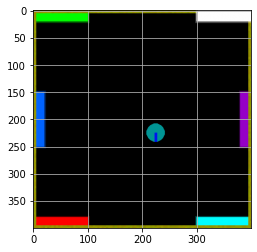

In [53]:
playground = SingleRoom(size=(400, 400))
zone_0 = MultiAgentRewardZone(
    reward=1,
    physical_shape="rectangle",
    texture=[255, 0, 0],
        size=(100, 20),
)
zone_2 = MultiAgentRewardZone(
    reward=100,
    physical_shape="rectangle",
    texture=[0, 255, 0],
    size=(100, 20),
)
zone_3 = MultiAgentRewardZone(
    reward=10_000,
    physical_shape="rectangle",
    texture=[255, 255, 255],
    size=(100, 20),
)
zone_5 = MultiAgentRewardZone(
    reward=1_000_000,
    physical_shape="rectangle",
    texture=[0, 255, 255],
    size=(100, 20),
)
zone_1 = MultiAgentRewardZone(
    reward=1_000_000,
    physical_shape="rectangle",
    texture=[0, 100, 255],
    size=(20, 100),
)
zone_4 = MultiAgentRewardZone(
    reward=1_000_000,
    physical_shape="rectangle",
            texture=[150, 0, 200],
    size=(20, 100),
)

playground.add_element(zone_0, ((50, 390), 0))
playground.add_element(zone_1, ((10, 200),0))
playground.add_element(zone_2, ((50, 10), 0))
playground.add_element(zone_3, ((350, 10), 0))
playground.add_element(zone_4, ((390, 200), 0))
playground.add_element(zone_5, ((350, 390), 0))

agent = BaseAgent(controller=Keyboard(), interactive=False)
playground.add_agent(agent, ((225, 225), 3.14 / 2),)


engine = Engine(time_limit=1000, playground=playground)
# run episode
RUN = False
if RUN:
    i = 0
    while engine.game_on:
        if agent.reward != 0:
            print(agent.reward)
        i += 1
        actions = engine.get_actions()
        engine.step(actions)
        engine.update_observations()
        pygame.time.wait(100)
plt.imshow(engine.generate_playground_image())
plt.grid()
engine.terminate()


In [63]:
1e-4 * 10 < 0.01

True

In [64]:
x = 1e-4
for i in range(6):
    x *= 100
    print(x)

0.01
1.0
100.0
10000.0
1000000.0
100000000.0


In [32]:
i

66

In [ ]:
# # my_playground = GridRooms((300,300), (3,3), 50, random_doorstep_position=False)

# my_playground = LineRooms(size=(450, 100), number_rooms=3, doorstep_size=50, random_doorstep_position=True)
# room = my_playground.grid_rooms[0][1]
# left_door = room.doorstep_left.generate_door()
# right_door = room.doorstep_right.generate_door()
# my_playground.add_element(left_door)
# my_playground.add_element(right_door)
# left_switch = OpenCloseSwitch(door=left_door)
# my_playground.add_element(left_switch, room.get_random_position_on_wall("left", left_switch))
# right_switch = OpenCloseSwitch(door=right_door,)
# my_playground.add_element(right_switch, room.get_random_position_on_wall("right", right_switch))

# left_zone = MultiAgentRewardZone(
#     reward=1,
#     physical_shape="rectangle",
#     texture=[255,0,0],
#     size=(25,25)
# )

# right_zone = MultiAgentRewardZone(
#     reward=100,
#     physical_shape="rectangle",
#     texture=[255,0,0],
#     size=(25,25)
# )
# my_playground.add_element(left_zone, ((25,50),0))
# my_playground.add_element(right_zone, ((425,50),0))



# # for i, room in enumerate(my_playground.grid_rooms.flatten()):
# #     if i == 4:
# #         left_door = room.doorstep_left.generate_door()
# #         right_door = room.doorstep_right.generate_door()
# #         down_door = room.doorstep_down.generate_door()
# #         up_door = room.doorstep_up.generate_door()
# #     elif i in [0, 2, 6, 8]:
# #         try:
# #             door = room.doorstep_left.generate_door()
# #             my_playground.add_element(door)
# #         except:
# #             pass
# #         try:
# #             door = room.doorstep_right.generate_door()
# #             my_playground.add_element(door)
# #         except:
# #             pass
# #         try:
# #             door = room.doorstep_down.generate_door()
# #             my_playground.add_element(door)
# #         except:
# #             pass
# #         try:
# #             door = room.doorstep_up.generate_door()
# #             my_playground.add_element(door)
# #         except:
# #             pass

# # my_playground.add_element(left_door)
# # my_playground.add_element(right_door)
# # my_playground.add_element(down_door)
# # my_playground.add_element(up_door)

# # left_switch = OpenCloseSwitch(door=left_door, size=(10, 10))
# # my_playground.add_element(left_switch,  ((215,15),0), )
# # right_switch = OpenCloseSwitch(door=right_door,)
# # my_playground.add_element(right_switch, ((285,15),0))
# # down_switch = OpenCloseSwitch(door=down_door)
# # my_playground.add_element(down_switch,((215,85),0))
# # up_switch = OpenCloseSwitch(door=up_door)
# # my_playground.add_element(up_switch, ((285,85),0))

# # left_zone = MultiAgentRewardZone(
# #     reward=1,
# #     physical_shape="rectangle",
# #     texture=[255,0,0],
# #     size=(25,25)
# # )

# # right_zone = MultiAgentRewardZone(
# #     reward=100,
# #     physical_shape="rectangle",
# #     texture=[255,0,0],
# #     size=(25,25)
# # )

# # down_zone = MultiAgentRewardZone(
# #     reward=10_000,
# #     physical_shape="rectangle",
# #     texture=[255,0,0],
# #     size=(25,25)
# # )

# # up_zone = MultiAgentRewardZone(
# #     reward=1_000_000,
# #     physical_shape="rectangle",
# #     texture=[255,0,0],
# #     size=(25,25)
# # )

# # my_playground.add_element(left_zone, ((50,150),0))
# # my_playground.add_element(right_zone, ((250,150),0))
# # my_playground.add_element(down_zone, ((150,50),0))
# # my_playground.add_element(up_zone, ((150,250),0))


# # # Agent
# agent = BaseAgent(controller=Dummy(), interactive=True, name="pep")
# agent.add_sensor(
#     PerfectSemantic(
#         agent.base_platform,
#         min_range=0,
#         max_range=400,
#         name="sensor",
#         normalize=True,
#     )
# )
# my_playground.add_agent(agent, ((225, 25), 3.14 / 2),)

# agent2 = BaseAgent(controller=Keyboard(), interactive=True, name="pepo",)
# my_playground.add_agent(agent2, ((225, 75), 3.14 / 2),)


# engine = Engine(time_limit=1000, playground=my_playground)
# o = []
# # run episode
# RUN = False
# if RUN:
#     i = 0
#     while engine.game_on:
#         i += 1
#         actions = engine.get_actions()
#         engine.step(actions)
#         engine.update_observations()
#         o.append(agent.observations)
#         pygame.time.wait(100)
# plt.imshow(engine.generate_playground_image())
# plt.grid()

# engine.terminate()


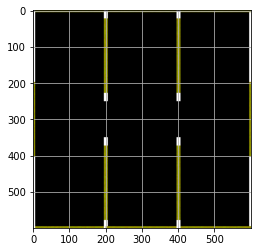

In [21]:
# my_playground = GridRooms((300,300), (3,3), 50, random_doorstep_position=False)

my_playground = LineRooms(size=(600, 600), number_rooms=3, doorstep_size=100, random_doorstep_position=False)

# left_zone = MultiAgentRewardZone(
#     reward=1,
#     physical_shape="rectangle",
#     texture=[255,0,0],
#     size=(25,25)
# )

# right_zone = MultiAgentRewardZone(
#     reward=100,
#     physical_shape="rectangle",
#     texture=[255,0,0],
#     size=(25,25)
# )
# my_playground.add_element(left_zone, ((25,50),0))
# my_playground.add_element(right_zone, ((425,50),0))




# # Agent
# agent = BaseAgent(controller=Dummy(), interactive=True, name="pep")
# agent.add_sensor(
#     PerfectSemantic(
#         agent.base_platform,
#         min_range=0,
#         max_range=400,
#         name="sensor",
#         normalize=True,
#     )
# )
# my_playground.add_agent(agent, ((225, 25), 3.14 / 2),)

# agent2 = BaseAgent(controller=Keyboard(), interactive=True, name="pepo",)
# my_playground.add_agent(agent2, ((225, 75), 3.14 / 2),)


engine = Engine(time_limit=1000, playground=my_playground)
# o = []
# run episode
RUN = False
if RUN:
    i = 0
    while engine.game_on:
        i += 1
        actions = engine.get_actions()
        engine.step(actions)
        engine.update_observations()
        o.append(agent.observations)
        pygame.time.wait(100)
plt.imshow(engine.generate_playground_image())
plt.grid()

engine.terminate()


In [15]:
room.get_random_position_on_wall("left", left_switch)

(Vec2d(205.0, 224.46582378822671), -1.5707963267948966)

In [113]:
len([el for el in my_playground.elements if isinstance(el, Door)])

24

In [51]:
o[-1]

{<simple_playgrounds.device.sensors.semantic.PerfectSemantic at 0x7fd0f0d42760>: [Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7fd0f17c3be0>, distance=0.455859976825734, angle=-2.150139420373618),
  Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7fd0f0c4b370>, distance=0.3501677008147417, angle=1.5968908060998075),
  Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7fd0f0c1e370>, distance=0.3748322991852583, angle=-1.5447018474899856),
  Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7fd0f0c2ca30>, distance=0.10306009181497977, angle=0.026094479304910934),
  Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7fd0f0c6c820>, distance=0.28255880565633684, angle=-2.607955841050744),
  Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7fd0f0c65b50>, distance=0.28255880565633684, angle=-2.607955841050744),
  Detection(ent

In [55]:
o[0]

{<simple_playgrounds.device.sensors.semantic.PerfectSemantic at 0x7fd0f0d42760>: [Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7fd0f17c3be0>, distance=0.3, angle=-1.5700000000000003),
  Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7fd0f0c4b370>, distance=0.5202163011671204, angle=0.9569297016676277),
  Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7fd0f0c1e370>, distance=0.4242640687119285, angle=-0.784601836602552),
  Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7fd0f0c2ca30>, distance=0.6625, angle=0.0007963267948962738),
  Detection(entity=<simple_playgrounds.element.elements.basic.Door object at 0x7fd0eef4fe20>, distance=0.2875, angle=0.0007963267948962738),
  Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7fd0f0c6c820>, distance=0.2942150573984955, angle=-0.2132643567689252),
  Detection(entity=<simple_playgrounds.element.elem

In [54]:
len([v for v in o[-1].values()][0])

11